# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
Based on the data analysis, here are three observations /inferences that can be made:
1.	Capomulin's Efficacy: The average tumor volume for mice treated with Capomulin is 40.68 mm, with a median of 41.56 mm. This indicates that Capomulin is effective in reducing tumor size, as the tumor volumes are lower compared to other treatment regimens like Ceftamin and Infubinol.
2.	Consistency in Capomulin's Effects: The low variance (24.95) and standard deviation (4.99) in tumor volumes for mice treated with Capomulin suggest that the treatment has consistent effects across the sample. This consistency is crucial for the reliability and effectiveness of Capomulin as a treatment option for squamous cell carcinoma.
3.	Correlation Between Weight and Tumor Volume: The strong positive correlation coefficient of 0.84 between mouse weight and average tumor volume within the Capomulin regimen indicates that as the weight of the mouse increases, the average tumor volume also tends to increase. This correlation is important to consider in treatment planning and dosage adjustments for Capomulin.
These observations suggest that Capomulin is a promising treatment for squamous cell carcinoma, with consistent effects and a clear correlation with mouse weight. 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how='left')

# Display the data table for preview
combined_data.head()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [5]:
# Checking the number of mice.

# Number of unique mice
number_of_mice = combined_data['Mouse ID'].nunique()

# Display the number of unique mice
number_of_mice

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find duplicate entries
duplicate_entries = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

# Get the Mouse ID numbers for the duplicate mice
duplicate_mouse_ids = duplicate_entries['Mouse ID'].unique()

# Display the duplicate mouse IDs
duplicate_mouse_ids


array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_mouse_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the clean DataFrame
clean_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [11]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = clean_data['Mouse ID'].nunique()
number_of_mice_clean

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_regimen = clean_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = grouped_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame.
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

summary_stats

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [20]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
)

#summary_statistics.columns = ['mean', 'median', 'var', 'std', 'sem']
#summary_statistics.columns = ['Mean', 'Median', 'Tumor Volume (mm3) var', 'Tumor Volume (mm3) std', 'Tumor Volume (mm3) sem']

# Create a MultiIndex for the columns
summary_statistics.columns = pd.MultiIndex.from_tuples([
    ('', 'mean'),
    ('', 'median'),
    ('Tumor Volume (mm3)', 'var'),
    ('Tumor Volume (mm3)', 'std'),
    ('Tumor Volume (mm3)', 'sem')
])


summary_statistics

Tumor Volume (mm3)                    
                   mean     median                var       std       sem
Drug Regimen                                                             
Capomulin     40.675741  41.557809          24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157          39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584          43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743          68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285          66.173479  8.134708  0.596466
Placebo       54.033581  52.288934          61.168083  7.821003  0.581331
Propriva      52.320930  50.446266          43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236          23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737          59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479          48.533355  6.966589  0.516398

## Bar and Pie Charts

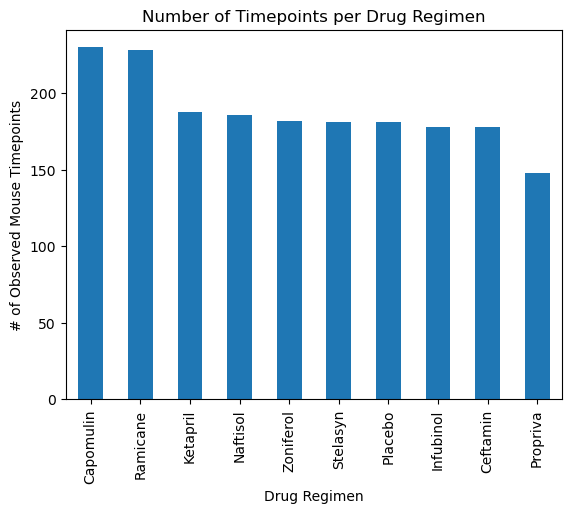

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group data by 'Drug Regimen' and count the number of timepoints for each
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Generate a bar plot using Pandas
bar_plot = regimen_counts.plot(kind='bar', title='Number of Timepoints per Drug Regimen')

# Set the labels for the x and y axes
bar_plot.set_xlabel('Drug Regimen')
bar_plot.set_ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.show()

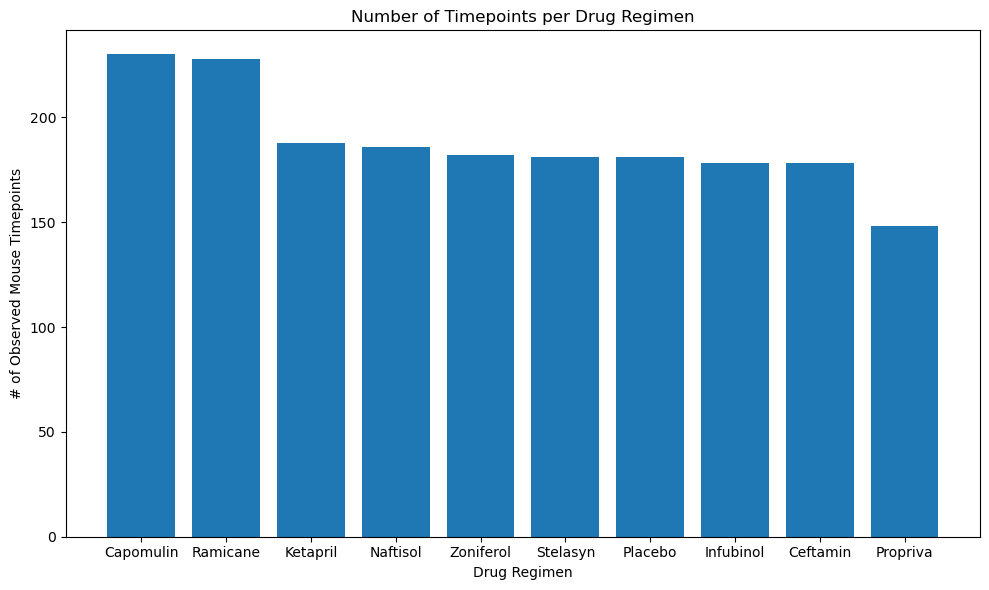

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group data by 'Drug Regimen' and count the number of timepoints for each
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Get the x-axis labels (Drug Regimen names) and the y-axis values (counts)
x_labels = regimen_counts.index
y_values = regimen_counts.values

# Generate a bar plot using pyplot
plt.figure(figsize=(10,6))
plt.bar(x_labels, y_values)

# Set the title and labels for the x and y axes
plt.title('Number of Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.tight_layout()
plt.show()


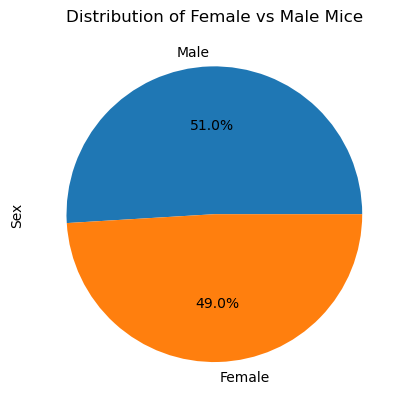

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of female and male mice
sex_distribution = clean_data['Sex'].value_counts()

# Generate a pie plot using Pandas
pie_plot = sex_distribution.plot.pie(autopct='%1.1f%%', startangle=0, title='Distribution of Female vs Male Mice')

# Set the y-axis label 'Sex'
pie_plot.set_ylabel('Sex')

# Show the plot
plt.show()

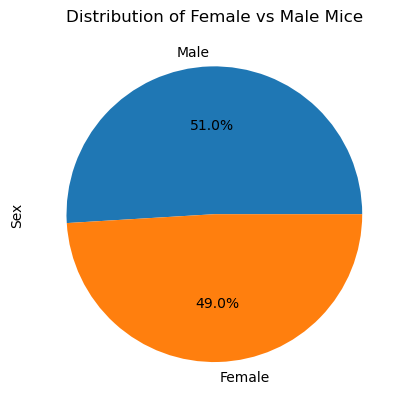

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of female and male mice
sex_distribution = clean_data['Sex'].value_counts()

# Data for pie chart
labels = sex_distribution.index
sizes = sex_distribution.values


# Generate a pie plot using pyplot
plt.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=0)

plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')  # display y-axis label 'Sex'

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoin



# List of treatment regimens to analyze
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the merged DataFrame for the specified treatment regimens
final_tumor_volume_df = merged_df[merged_df['Drug Regimen'].isin(treatment_regimens)]




# Display the final tumor volume data
final_tumor_volume

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
..      ...        ...                 ...               ...          ...   
95     y769         45           68.594745                 4     Ceftamin   
96     y793         45           31.896238                 2    Capomulin   
97     y865         45           64.729837                 3     Ceftamin   
98     z578         45           30.638696                 0     Ramicane   
99     z581         45           62.754451                 3    Infubinol   

       Sex  Age_months  Weight (g)  
0   Female          20          23  
1   Female          21          25  
2   Female          20          28  
3     Male           3          22  
4   Female          10          25  
..     ...         ...         ...  
95  Female           6          27  
96    Male          17          17  
97    Male          23          26  
98    Male          11          16  
99  Female          24          25  

[100 rows x 8 columns]

In [68]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    
    
# List of treatments to analyze
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to store tumor vol data for plotting
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the tumor volume list for plotting
    tumor_vol_list.append(tumor_volumes)
    
    # Calculate the IQR
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results for each treatment
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


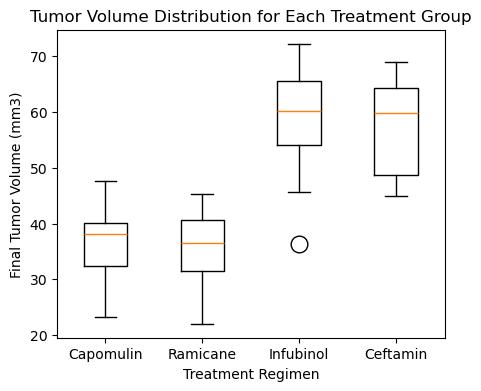

In [110]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(5, 4))
plt.boxplot(tumor_vol_list, labels=treatments, flierprops=dict(marker='o', markersize=12, color='red'))
plt.title('Tumor Volume Distribution for Each Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Treatment Regimen')
plt.show()

## Line and Scatter Plots

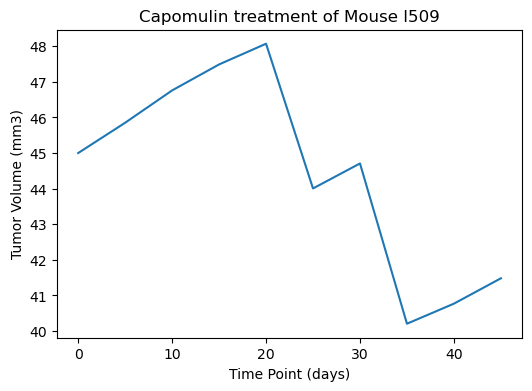

In [111]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


# Choose a mouse treated with Capomulin
mouse_id = 'l509'  
# Filter the data for the chosen mouse ID
capomulin_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id)]

# Generate the line plot
plt.figure(figsize=(6, 4))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], label='Tumor Volume')

plt.title(f'Capomulin treatment of Mouse {mouse_id}')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

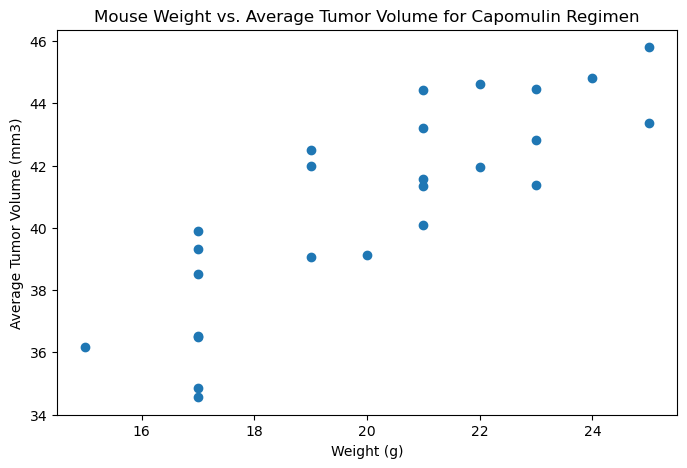

In [112]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Group the data by mouse ID and calculate the average tumor volume
capomulin_avg = clean_data[clean_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Generate the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is: 0.84


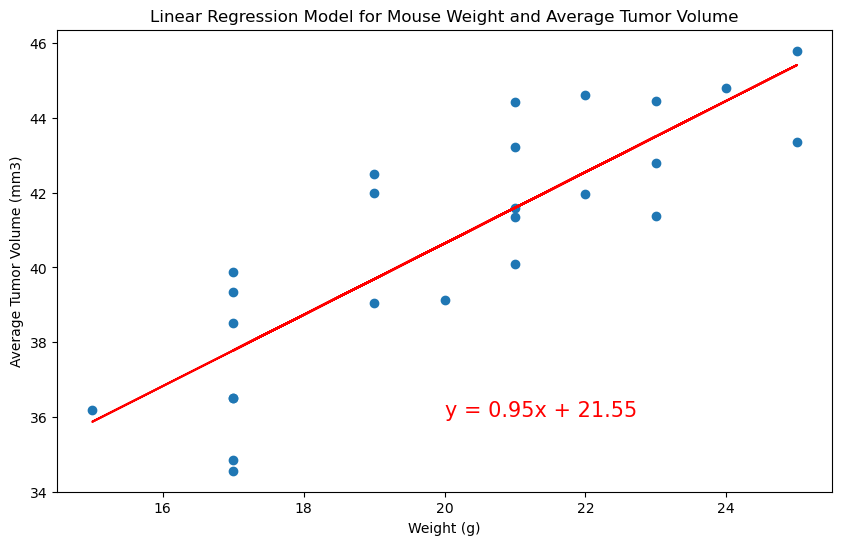

The r-squared is: 0.709
Linear Regression Equation: y = 0.95x + 21.55


In [119]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Extract the weight and tumor volume data
weights = capomulin_avg['Weight (g)']
tumor_volumes = capomulin_avg['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation = st.pearsonr(weights, tumor_volumes)
print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation[0]:.2f}")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, tumor_volumes)

# Get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate the regression values
regress_values = weights * slope + intercept

# Plot the linear model on top of the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(weights, tumor_volumes)
plt.plot(weights, regress_values, "r-")
plt.annotate(line_eq, (20, 36), fontsize=15, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Linear Regression Model for Mouse Weight and Average Tumor Volume')
plt.show()

# Print out the r-squared value along with the line equation
print(f"The r-squared is: {rvalue**2:.3f}")
print(f"Linear Regression Equation: {line_eq}")